In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pickle
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Web Scraping

In [7]:
filename = 'data/pitchfork_15-present.html'
file = open(filename, 'r')
soup = BeautifulSoup(file, 'html.parser')


In [8]:
link_tags = soup.findAll('a', {'class': ['review__link']})
real_links = []
for tag in link_tags:
    real_links.append(tag.get('href'))

In [9]:
files = 'pitchfork_rev_links.pickle'
pickle.dump(real_links, open(files, 'wb'))

In [10]:
album = []
artist = []
score = []
genres = []
summary = []
for i in tqdm(real_links):
    time.sleep(2)
    url = i
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    album_tag = soup.find('h1', {'class': ['single-album-tombstone__review-title']})
    artist_tag = soup.find('ul', {'class': ['artist-links artist-list single-album-tombstone__artist-links']})
    score_tag = soup.find('span', {'class': ['score']})
    genres_tag = soup.find('ul', {'class': ['genre-list genre-list--before']})
    summary_tag = soup.find('div', {'class': ['review-detail__abstract']})
    try:
        album.append(album_tag.get_text())
    except AttributeError:
        album.append('null')
    try:
        artist.append(artist_tag.get_text())
    except AttributeError:
        artist.append('null')
    try:
        score.append(score_tag.get_text())
    except AttributeError:
        score.append('null')
    try:
        genres.append(genres_tag.get_text())
    except AttributeError:
        genres.append('null')
    try:
        summary.append(summary_tag.get_text())
    except AttributeError:
        summary.append('null')
    
print(album, artist, score, genres, summary)
    


  0%|          | 2/1116 [00:07<1:06:15,  3.57s/it]

KeyboardInterrupt: 

In [13]:
with open('pitchfork_album.pickle', 'wb') as f:
    pickle.dump(album, f)
with open('pitchfork_artist.pickle', 'wb') as f:
    pickle.dump(artist, f)
with open('pitchfork_score.pickle', 'wb') as f:
    pickle.dump(score, f)
with open('pitchfork_genres.pickle', 'wb') as f:
    pickle.dump(genres, f)
with open('pitchfork_summary.pickle', 'wb') as f:
    pickle.dump(summary, f)

In [14]:
pitchfork_df = pd.DataFrame([album, artist, score, genres, summary]).transpose()
pitchfork_df.columns = ['Album', 'Artist', 'Score', 'Genres', 'Summary']
print(len(pitchfork_df))
pitchfork_df.head(100)

72


,Album,Artist,Score,Genres,Summary
0,For You,India Jordan,8.0,null,The UK producer arranges classic dance tropes ...
1,Both,Bill Nace,7.9,Experimental,The experimental guitarist who made his name o...
2,The World I’m Going to Hell For,Nathan Micay,7.6,Experimental,The Berlin-based producer swaps his habitually...
3,Acquiesce,TALsounds,7.6,Experimental,The synth compositions of Chicago experimental...
4,Elliott Smith,Elliott Smith,9.5,Rock,"Each Sunday, Pitchfork takes an in-depth look ..."
...,...,...,...,...,...
67,Sogni,Primo!,7.5,Rock,"The Melbourne quartet’s catchy, plainspoken po..."
68,Dark Lane Demo Tapes,Drake,6.8,Rap,Drake’s new project is a mixtape of glossy “de...
69,Frozen,Klein,7.6,Experimental,Slipping between stark realism and meditative ...
70,The Mother Stone,Caleb Landry Jones,6.4,Rock,The film actor’s musical debut is full of shad...


In [15]:
pitchfork_df.to_pickle("pitchfork_df.pickle")


## Visualizations

In [16]:
pitchfork_df = pitchfork_df[pitchfork_df.Score != 'null']


In [17]:
s = pitchfork_df['Score']


In [18]:
x = pd.to_numeric(s)


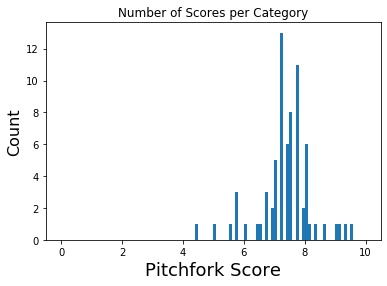

In [19]:
plt.hist(x, bins=100, range=(0,10))
plt.xlabel('Pitchfork Score', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Scores per Category')
plt.show()